In [122]:
# import libraries
import pandas as pd
import numpy as np
import random
import string
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# The number of unique identifiers for CustomerID and ProductID
num_of_customer_ids = 40
num_of_product_ids = 95
total_rows = 2000  # number of rows in Data set

# The period of time
start_date = '2024-01-01'
end_date = '2024-06-30'

# Function to generate random alphanumeric identifiers for CustomerID
def generate_identifier(length, num_ids):
    alphanumeric = string.ascii_letters + string.digits
    return [''.join(random.choice(alphanumeric) for _ in range(length)) for _ in range(num_ids)]

# Function to generate random numeric identifiers for ProductID
def generate_identifier_2(length, num_ids):
    numeric = string.digits
    return [''.join(random.choice(numeric) for _ in range(length)) for _ in range(num_ids)]

# Generate unique CustomerIDs and ProductIDs
unique_customer_ids = generate_identifier(8, num_of_customer_ids)
unique_product_ids = generate_identifier_2(5, num_of_product_ids)

# Random prices with two decimal places
prices = np.round(np.random.uniform(1, 100, total_rows), 2)

# A dictionary with the data
data = {
    'TransactionID': np.arange(1, total_rows + 1),  
    'Date': pd.to_datetime([random.choice(pd.date_range(start_date, end_date)) for _ in range(total_rows)]),
    'CustomerID': np.random.choice(unique_customer_ids, total_rows),
    'ProductID': np.random.choice(unique_product_ids, total_rows),
    'Quantity': np.random.randint(1, 100, size=total_rows),
    'Price': prices
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

In [124]:
# adding new colum TotalAmount
df['TotalAmount'] = df['Price'] * df['Quantity']

In [126]:
df.head()

,TransactionID,Date,CustomerID,ProductID,Quantity,Price,TotalAmount
0,1,2024-05-21,KhdatZHI,04327,74,86.82,6424.68
1,2,2024-03-18,dN5s1Clf,53104,43,52.01,2236.43
2,3,2024-04-19,TegRRf90,77708,95,79.72,7573.40
3,4,2024-04-27,wDmFBzzb,75006,81,51.45,4167.45
4,5,2024-02-19,23REk5xB,64026,40,26.67,1066.80


In [128]:
# Saving data set in Excel
df.to_excel('dataset.xlsx', index=False)

In [129]:
# Descriptive statistic
df.describe()

,TransactionID,Date,Quantity,Price,TotalAmount
count,2000.000000,2000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2024-03-30 09:04:19.200000256,50.680500,49.911675,2556.380635
min,1.000000,2024-01-01 00:00:00,1.000000,1.030000,7.220000
25%,500.750000,2024-02-14 00:00:00,26.000000,25.802500,722.925000
50%,1000.500000,2024-03-30 00:00:00,50.000000,49.700000,1975.035000
75%,1500.250000,2024-05-15 00:00:00,77.000000,73.755000,3864.120000
max,2000.000000,2024-06-30 00:00:00,99.000000,100.000000,9836.640000
std,577.494589,NaN,28.897871,27.925720,2201.089097


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  2000 non-null   int32         
 1   Date           2000 non-null   datetime64[ns]
 2   CustomerID     2000 non-null   object        
 3   ProductID      2000 non-null   object        
 4   Quantity       2000 non-null   int32         
 5   Price          2000 non-null   float64       
 6   TotalAmount    2000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(2)
memory usage: 93.9+ KB


In [134]:
#Detection of unique product and customer IDs
unique_ProductIDs = df['ProductID'].nunique()
unique_CustomerIDs = df['CustomerID'].nunique()
print ("Amount of unique ProductIDs: ",(unique_ProductIDs))
print ("Amount of unique CustomerIDs: ",(unique_CustomerIDs))

Amount of unique ProductIDs:  95
Amount of unique CustomerIDs:  40


In [136]:
# Calculation of total sales and average sales per transaction
TotalAmount_sum = df['TotalAmount'].sum()
TotalAmount_avg = df['TotalAmount'].mean()
print ("Total Sales:",(TotalAmount_sum))
print ("Average sales per transaction:",(round(TotalAmount_avg,2)))

Total Sales: 5112761.2700000005
Average sales per transaction: 2556.38


In [138]:
df['Date'] = pd.to_datetime(df['Date']) 
# Seting date as the index
df.set_index(["Date"], inplace=True)

In [140]:
# Monthly sales calculation
monthly_sales = df.resample('M').sum()[['Quantity','TotalAmount']]
monthly_sales['Year'] = monthly_sales.index.year
monthly_sales['Month'] = monthly_sales.index.strftime('%b')
monthly_sales = monthly_sales[['Year', 'Month', 'Quantity', 'TotalAmount']]
monthly_sales.reset_index(drop=True, inplace=True)
print("Monthly Sales")
print (monthly_sales)

Monthly Sales
   Year Month  Quantity  TotalAmount
0  2024   Jan     18211    917164.76
1  2024   Feb     16997    840771.89
2  2024   Mar     17332    892515.71
3  2024   Apr     17349    863105.28
4  2024   May     15150    748282.56
5  2024   Jun     16322    850921.07


In [142]:
# Calculation of weekly sales
weekly_sales = df.resample('W').sum()[['Quantity','TotalAmount']]
weekly_sales['Year'] = weekly_sales.index.year
weekly_sales['Week'] = weekly_sales.index.isocalendar().week
weekly_sales = weekly_sales[['Year', 'Week', 'Quantity', 'TotalAmount']]
weekly_sales.reset_index(drop=True, inplace=True)
print("Weekly Sales")
print (weekly_sales.head())

Weekly Sales
   Year  Week  Quantity  TotalAmount
0  2024     1      4312    204683.84
1  2024     2      5117    252947.23
2  2024     3      3669    203143.12
3  2024     4      3852    196016.94
4  2024     5      3080    161637.27


In [144]:
# Identification of TOP 5 customers and total amount per customer
CustomerID_counts = df['CustomerID'].value_counts()
top_5_CustomerID_counts = CustomerID_counts.head(5)
top_5_Customers = top_5_CustomerID_counts.index
CustomerID_total_amount = df.groupby('CustomerID')['TotalAmount'].sum()
top_5_Customers_df = pd.DataFrame({
    'CustomerID': top_5_Customers,
    'Total amount of Transactions': CustomerID_total_amount[top_5_Customers].values,
    'Count of Transactions': top_5_CustomerID_counts.values
})
print("TOP 5 Customers")
print(top_5_Customers_df)

TOP 5 Customers
  CustomerID  Total amount of Transactions  Count of Transactions
0   kMwzoJUd                     177454.42                     64
1   NpOwHoIS                     162983.36                     63
2   Ex3IqSR9                     203652.24                     63
3   8O3mHxNY                     171334.04                     62
4   Jkfepxup                     162096.68                     59


In [146]:
# Detecting TOP 5 inactive Customers and their Total Amount
CustomerID_counts = df['CustomerID'].value_counts()
inactive_5_CustomerID_counts = CustomerID_counts.tail(5)
inactive_5_Customers = inactive_5_CustomerID_counts.index
CustomerID_total_amount = df.groupby('CustomerID')['TotalAmount'].sum()
inactive_5_Customers_df = pd.DataFrame({
    'CustomerID': inactive_5_Customers,
    'Total amount of Transactions': CustomerID_total_amount[inactive_5_Customers].values,
    'Count of Transactions': inactive_5_CustomerID_counts.values
})
print("TOP 5 less active Customers and Saleas Amounts")
print(inactive_5_Customers_df)

TOP 5 less active Customers and Saleas Amounts
  CustomerID  Total amount of Transactions  Count of Transactions
0   JQ20uC2F                      90242.70                     43
1   hxxI0zPY                     107586.40                     42
2   KsrzzxDV                      98080.83                     40
3   QLVNUrYe                     106626.43                     40
4   jxekK4d1                      90436.77                     36


In [148]:
monthly_data = df.groupby('CustomerID')['TotalAmount'].resample('M').sum().reset_index()
monthly_data['Date'] = monthly_data['Date'].dt.strftime('%Y-%m')
monthly_data = monthly_data[['Date', 'CustomerID', 'TotalAmount']]
CustomerIDs = monthly_data
print("Monthly transactions Amount per Customer")
print(monthly_data)

Monthly transactions Amount per Customer
        Date CustomerID  TotalAmount
0    2024-01   0s67oRp0     15944.77
1    2024-02   0s67oRp0     11898.43
2    2024-03   0s67oRp0     24660.59
3    2024-04   0s67oRp0     22828.19
4    2024-05   0s67oRp0     15027.61
..       ...        ...          ...
235  2024-02   xoTFi77e      9242.09
236  2024-03   xoTFi77e     17490.23
237  2024-04   xoTFi77e     15694.08
238  2024-05   xoTFi77e     20314.72
239  2024-06   xoTFi77e     27274.24

[240 rows x 3 columns]


In [150]:
# PIVOT TABLE Grouping customers by monthly total amount and sorting by total amount
monthly_data = df.groupby('CustomerID')['TotalAmount'].resample('M').sum().reset_index(name='TotalAmount')
monthly_data['Date'] = monthly_data['Date'].dt.strftime('%m-%Y')
pivot_table = monthly_data.pivot_table(index='CustomerID', columns ='Date',
                                       values = 'TotalAmount', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)

# Reordering columns to place 'Total' at the end
montly_sales_per_customer = pivot_table[[*pivot_table.columns[:-1], 'Total']]

# Sorting Data Frame by Total
montly_sales_per_customer.sort_values(by='Total', ascending=False, inplace=True)
print("Monthly transactions Amount per Customer")
montly_sales_per_customer.head()

Monthly transactions Amount per Customer


Date,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,Total
CustomerID,,,,,,,
Ex3IqSR9,39075.41,33513.69,32789.11,22386.04,54810.79,21077.20,203652.24
kMwzoJUd,27460.67,33042.93,28026.41,36966.22,19572.76,32385.43,177454.42
8O3mHxNY,35475.33,33841.48,30147.83,24398.07,20314.74,27156.59,171334.04
NpOwHoIS,23622.81,34542.70,37476.40,28642.85,25705.35,12993.25,162983.36
Jkfepxup,21968.29,38305.84,22741.51,30594.22,20355.31,28131.51,162096.68


In [152]:
# PIVOT TABLE Grouping Cutomers by monthly transactions count
monthly_transaction_counts= df.groupby('CustomerID').resample('M').size().reset_index(name='TransactionCount')
monthly_transaction_counts['Date'] = monthly_transaction_counts['Date'].dt.strftime('%m-%Y')
pivot_table = monthly_transaction_counts.pivot_table(index = 'CustomerID', columns = 'Date', 
                                                     values= 'TransactionCount', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
# Reordering columns to place 'Total' at the end
monthly_transaction_counts = pivot_table[[*pivot_table.columns[:-1], 'Total']]

# Sorting Data Frame by Total
monthly_transaction_counts.sort_values(by='Total', ascending=False, inplace=True)
print("Monthly transactions Amount per Customer")
monthly_transaction_counts.head()

Monthly transactions Amount per Customer


Date,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,Total
CustomerID,,,,,,,
kMwzoJUd,9,11,10,15,10,9,64
NpOwHoIS,7,11,11,15,12,7,63
Ex3IqSR9,13,10,10,8,13,9,63
8O3mHxNY,13,11,12,6,10,10,62
Jkfepxup,7,13,7,13,9,10,59


In [154]:
# Identification of the TOP 5 products by quantity sold
ProductID_counts = df['ProductID'].value_counts()
top_5_ProductID_counts = ProductID_counts.head(5)
top_5_Products = top_5_ProductID_counts.index
top_5_Products_total_amount = df.groupby('ProductID')['TotalAmount'].sum()
top_5_products_df= pd.DataFrame ({
        'ProductID' : top_5_Products, 
        'Total sold Amount': top_5_Products_total_amount[top_5_Products].values,
        'Total sold Quantity': top_5_ProductID_counts.values
})
print('TOP 5 Products')
top_5_products_df

TOP 5 Products


,ProductID,Total sold Amount,Total sold Quantity
0,16258,87490.45,33
1,17421,91986.07,33
2,34898,81125.96,32
3,64091,91428.73,29
4,04813,67063.44,28


In [156]:
# PIVOT TABLE Grouping Products by TotalAmount, by indicating monthly sales

monthly_data_products = df.groupby('ProductID')['TotalAmount'].resample('M').sum().reset_index(name='TotalAmount')
monthly_data_products['Date'] = monthly_data_products['Date'].dt.strftime('%m-%Y')

pivot_table = monthly_data_products.pivot_table(index='ProductID', columns ='Date',
                                       values = 'TotalAmount', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
monthly_data_products = pivot_table[[*pivot_table.columns[:-1], 'Total']]
monthly_data_products.sort_values(by='Total', ascending=False, inplace=True)
print("Montly sales Amount per Product")
monthly_data_products.head()

Montly sales Amount per Product


Date,01-2024,02-2024,03-2024,04-2024,05-2024,06-2024,Total
ProductID,,,,,,,
17421,21713.53,10381.46,22801.03,22319.14,6504.41,8266.50,91986.07
64091,19963.22,21699.78,9413.10,15360.04,17461.85,7530.74,91428.73
16258,10929.43,28955.28,11653.46,6032.01,13660.39,16259.88,87490.45
34898,17287.08,12928.47,12316.16,15517.91,6078.37,16997.97,81125.96
28195,13432.41,26031.34,8564.54,1036.12,18022.33,12832.04,79918.78


In [158]:
# Grouping by ProductID and calculating the average Price and Quantity
averages = df.groupby('ProductID').agg({'Price': 'mean', 'Quantity': 'mean'}).reset_index()

# Rounding the results
averages['Price'] = averages['Price'].round(2)
averages['Quantity'] = averages['Quantity'].round(0)

# Renaming the columns 
averages.columns = ['ProductID', 'AveragePrice', 'AverageQuantity']

# Sorting by average Quantity
sorted_averages = averages.sort_values(by = 'AverageQuantity', ascending= False).reset_index(drop=True)

sorted_averages

,ProductID,AveragePrice,AverageQuantity
0,64091,49.93,63.0
1,48201,49.97,62.0
2,23219,55.38,61.0
3,18247,52.07,61.0
4,58119,49.57,60.0
...,...,...,...
90,90547,52.25,39.0
91,78997,46.64,38.0
92,54233,48.19,37.0
93,81501,44.87,36.0


In [160]:
# Identification of low selling 5 products and sales amounts
ProductID_counts = df['ProductID'].value_counts()
low_selling_5_ProductID_counts = ProductID_counts.tail(5)
low_selling_5_Products = top_5_ProductID_counts.index
low_selling_5_Products_total_amount = df.groupby('ProductID')['TotalAmount'].sum()
low_selling_5_products_df= pd.DataFrame ({
        'ProductID' : low_selling_5_Products , 
        'Total sold Amount': low_selling_5_Products_total_amount[low_selling_5_Products].values,
        'Total sold Quantity': low_selling_5_ProductID_counts.values
})
print('low selling 5 Products')
low_selling_5_products_df

low selling 5 Products


,ProductID,Total sold Amount,Total sold Quantity
0,16258,87490.45,14
1,17421,91986.07,13
2,34898,81125.96,12
3,64091,91428.73,10
4,04813,67063.44,8


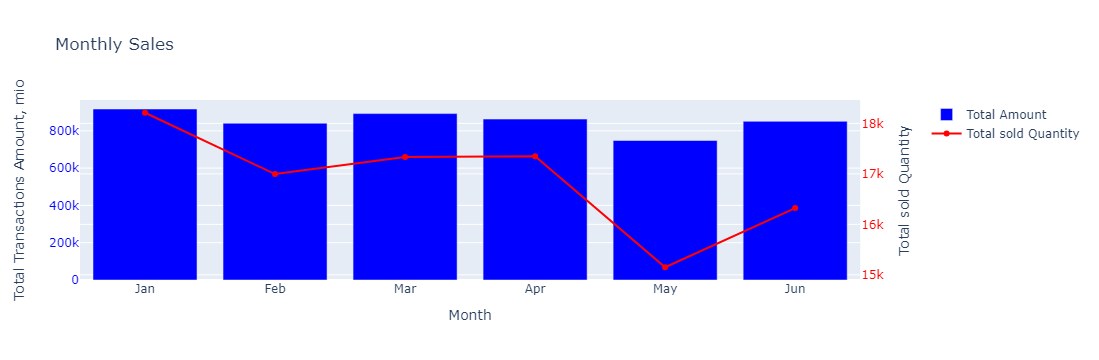

In [162]:


fig = make_subplots(specs=[[{"secondary_y": True}]])

# Bar trace for Total Amount
fig.add_trace(
    go.Bar(x=monthly_sales['Month'], y=monthly_sales['TotalAmount'], name='Total Amount', marker_color='blue'),
    secondary_y=False,
)

# Line trace for Quantity
fig.add_trace(
    go.Scatter(x=monthly_sales['Month'], y=monthly_sales['Quantity'], name='Total sold Quantity', mode='lines+markers', marker_color='red'),
    secondary_y=True,
)

# X-axis title
fig.update_xaxes(title_text="Month")

# Y-axes titles
fig.update_yaxes(title_text="Total Transactions Amount, mio", secondary_y=False, tickfont=dict(color='blue'))
fig.update_yaxes(title_text="Total sold Quantity", secondary_y=True, tickfont=dict(color='red'))

# Set plot title
fig.update_layout(title_text="Monthly Sales")

# Show plot
fig.show()

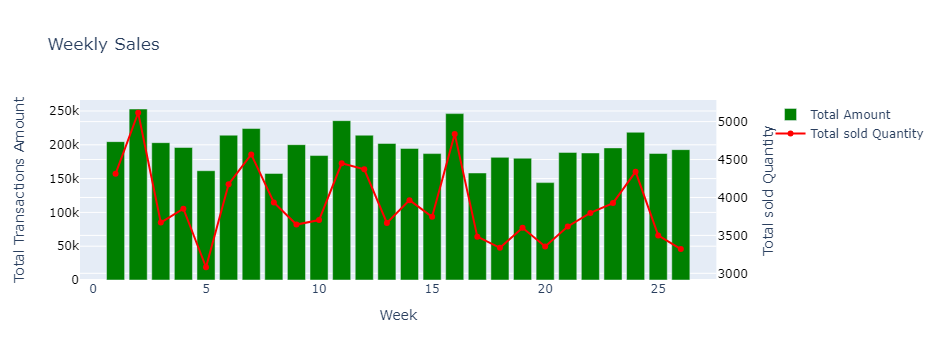

In [164]:

fig1 = make_subplots(specs=[[{"secondary_y": True}]])

# Bar trace for Total Amount
fig1.add_trace(
    go.Bar(x=weekly_sales['Week'], y=weekly_sales['TotalAmount'], name='Total Amount', marker_color='green'),
    secondary_y=False,
)

# Line trace for Quantity
fig1.add_trace(
    go.Scatter(x=weekly_sales['Week'], y=weekly_sales['Quantity'], name='Total sold Quantity', mode='lines+markers', marker_color='red'),
    secondary_y=True,
)

# X-axis title
fig1.update_xaxes(title_text="Week")

# Y-axes titles
fig1.update_yaxes(title_text="Total Transactions Amount", secondary_y=False, tickfont=dict(color='black'))
fig1.update_yaxes(title_text="Total sold Quantity", secondary_y=True, tickfont=dict(color='black'))

# Set plot title
fig1.update_layout(title_text="Weekly Sales")

# Show plot
fig1.show()

In [166]:
index=top_5_Customers_df.index
print(index)

RangeIndex(start=0, stop=5, step=1)


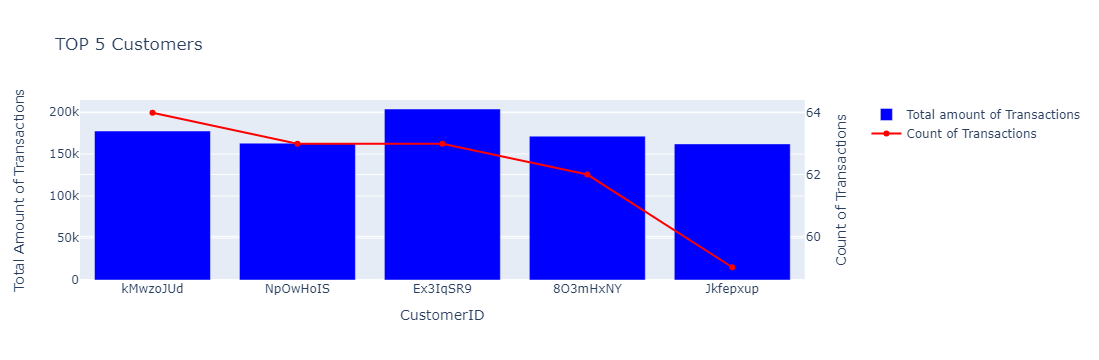

In [168]:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])

# Add bar trace for Total Amount
fig2.add_trace(
    go.Bar(x=top_5_Customers_df['CustomerID'], y=top_5_Customers_df['Total amount of Transactions'], name='Total amount of Transactions', marker_color='blue'),
    secondary_y=False,
)

# Add line trace for Count of Transactions
fig2.add_trace(
    go.Scatter(x=top_5_Customers_df['CustomerID'], y=top_5_Customers_df['Count of Transactions'], name='Count of Transactions', mode='lines+markers', marker_color='red'),
    secondary_y=True,
)

# Set x-axis title
fig2.update_xaxes(title_text="CustomerID")

# Set y-axes titles
fig2.update_yaxes(title_text="Total Amount of Transactions", secondary_y=False)
fig2.update_yaxes(title_text="Count of Transactions", secondary_y=True)

# Set plot title
fig2.update_layout(title_text="TOP 5 Customers")

# Show plot
fig2.show()

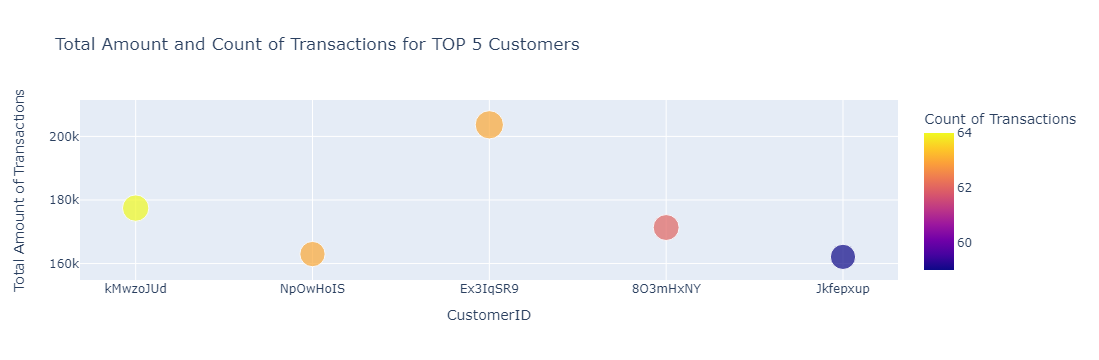

In [170]:
import plotly.express as px

# Create a scatter plot
fig3 = px.scatter(top_5_Customers_df, x='CustomerID', y='Total amount of Transactions', size='Total amount of Transactions', color='Count of Transactions',
                 title='Total Amount and Count of Transactions for TOP 5 Customers',
                 labels={'Total amount of Transactions': 'Total Amount of Transactions', 'CustomerID': 'CustomerID', 'Count of Transactions': 'Count of Transactions'})

# Show plot
fig3.show()

In [172]:
top_5_Customers_df_new_index = top_5_Customers_df.set_index('CustomerID')

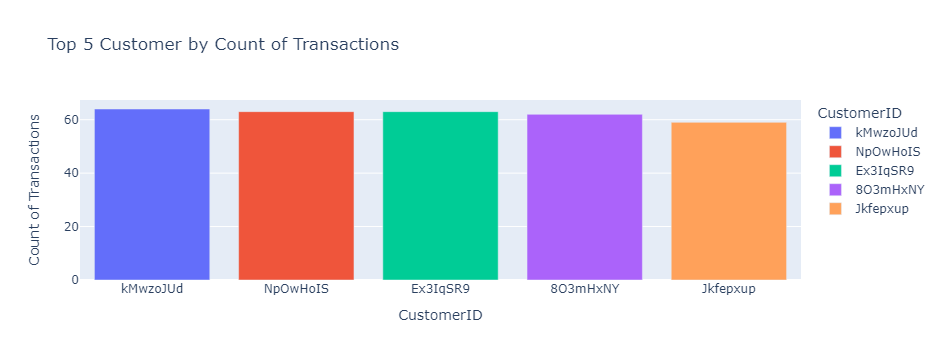

In [174]:
fig4 = make_subplots(rows=1, cols=2)

fig4 = px.bar(top_5_Customers_df, x='CustomerID', y='Count of Transactions', color='CustomerID', title='Top 5 Customer by Count of Transactions')

# Update layout to hide the legend if you want
fig4.update_layout(
    xaxis_title='CustomerID',
    yaxis_title='Count of Transactions',
    showlegend=True  # Set to False if you want to hide the legend
)

# Show plot
fig4.show()

In [176]:
#Create df to plot TOP 5 customer sales trends per month
montly_sales_per_customer_TOP5 = montly_sales_per_customer.head()
montly_sales_per_customer_TOP5 = montly_sales_per_customer_TOP5.transpose()
montly_sales_per_customer_TOP5_no_total = montly_sales_per_customer_TOP5.drop("Total")
montly_sales_per_customer_TOP5_no_total

CustomerID,Ex3IqSR9,kMwzoJUd,8O3mHxNY,NpOwHoIS,Jkfepxup
Date,,,,,
01-2024,39075.41,27460.67,35475.33,23622.81,21968.29
02-2024,33513.69,33042.93,33841.48,34542.70,38305.84
03-2024,32789.11,28026.41,30147.83,37476.40,22741.51
04-2024,22386.04,36966.22,24398.07,28642.85,30594.22
05-2024,54810.79,19572.76,20314.74,25705.35,20355.31
06-2024,21077.20,32385.43,27156.59,12993.25,28131.51


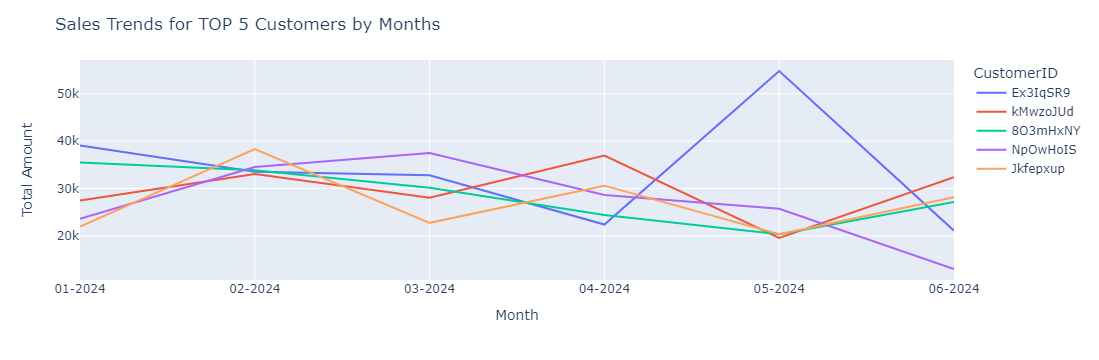

In [178]:
fig5 = px.line(montly_sales_per_customer_TOP5_no_total)
fig5.update_layout(title_text='Sales Trends for TOP 5 Customers by Months',
    xaxis_title='Month',
    yaxis_title='Total Amount'
)
# Show plot
fig5.show()

In [180]:
montly_sales_per_product_TOP5 = monthly_data_products.head()
montly_sales_per_product_TOP5 = montly_sales_per_product_TOP5.transpose()
montly_sales_per_product_TOP5_no_total = montly_sales_per_product_TOP5.drop("Total")
montly_sales_per_product_TOP5_no_total

ProductID,17421,64091,16258,34898,28195
Date,,,,,
01-2024,21713.53,19963.22,10929.43,17287.08,13432.41
02-2024,10381.46,21699.78,28955.28,12928.47,26031.34
03-2024,22801.03,9413.10,11653.46,12316.16,8564.54
04-2024,22319.14,15360.04,6032.01,15517.91,1036.12
05-2024,6504.41,17461.85,13660.39,6078.37,18022.33
06-2024,8266.50,7530.74,16259.88,16997.97,12832.04


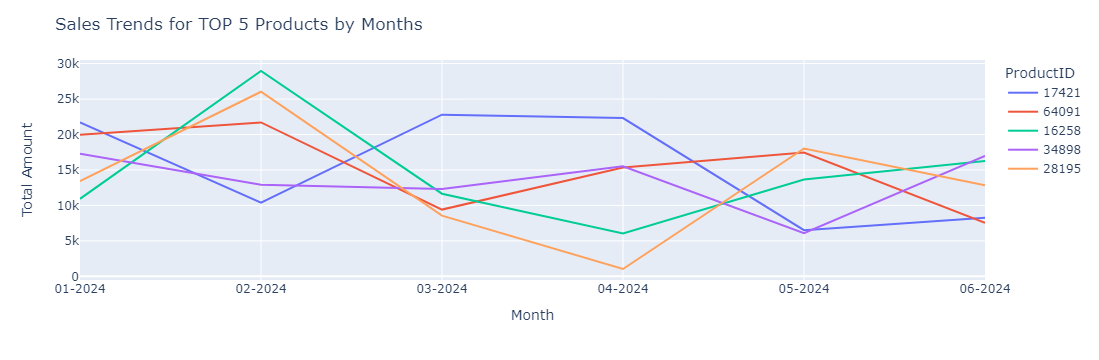

In [182]:
fig6 = px.line(montly_sales_per_product_TOP5_no_total)
fig6.update_layout(title_text='Sales Trends for TOP 5 Products by Months',
    xaxis_title='Month',
    yaxis_title='Total Amount'
)
# Show plot
fig6.show()

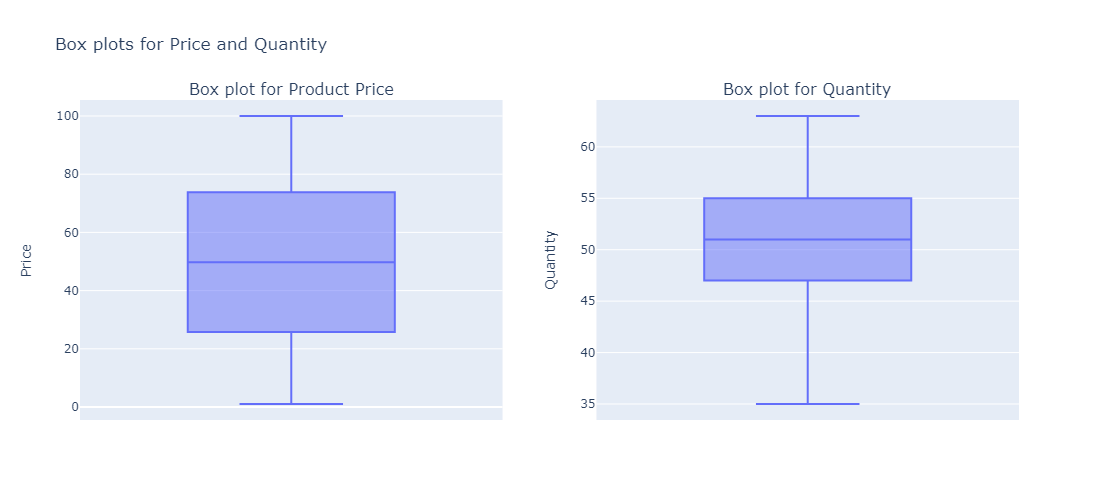

In [199]:

fig8 = make_subplots(rows=1, cols=2, subplot_titles=('Box plot for Product Price', 'Box plot for Quantity'))

# Create box plot for AveragePrice
fig1 = px.box(df, y='Price', title='Box plot for Price')
# Add box plot to the first subplot
fig8.add_trace(fig1.data[0], row=1, col=1)

# Create box plot for AverageQuantity
fig1 = px.box(df, y='Quantity', title='Box plot for Quantity')
# Add box plot to the second subplot
fig8.add_trace(fig2.data[0], row=1, col=2)

# Update y-axis labels
fig8.update_yaxes(title_text='Price', row=1, col=1)
fig8.update_yaxes(title_text='Quantity', row=1, col=2)

# Update layout for the entire figure
fig8.update_layout(
    title_text='Box plots for Price and Quantity',
    width=1000,
    height=500
)

# Show plot
fig8.show()

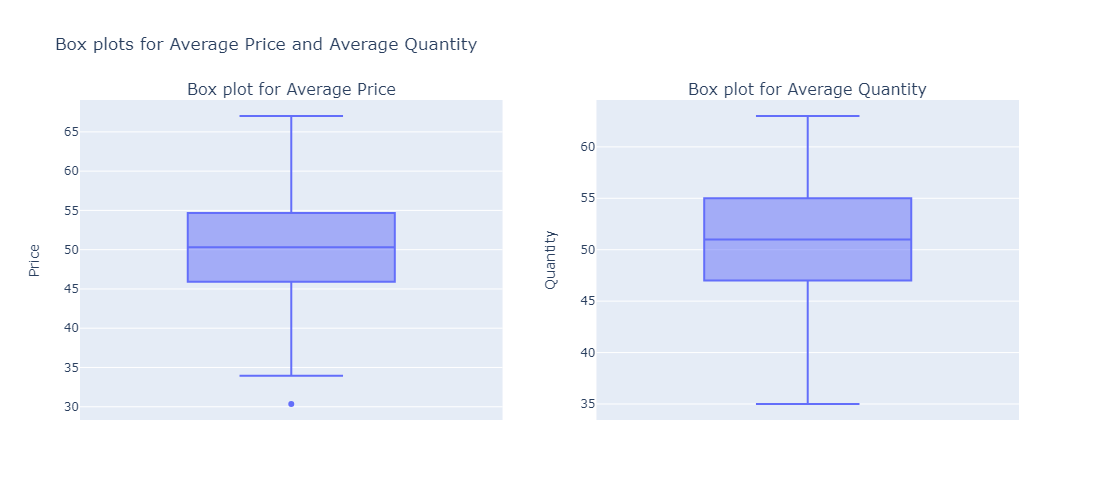

In [186]:

fig9 = make_subplots(rows=1, cols=2, subplot_titles=('Box plot for Average Price', 'Box plot for Average Quantity'))

# Create box plot for AveragePrice
fig1 = px.box(sorted_averages, y='AveragePrice', title='Box plot for Average Price')
# Add box plot to the first subplot
fig9.add_trace(fig1.data[0], row=1, col=1)

# Create box plot for AverageQuantity
fig2 = px.box(sorted_averages, y='AverageQuantity', title='Box plot for Average Quantity')
# Add box plot to the second subplot
fig9.add_trace(fig2.data[0], row=1, col=2)

# Update y-axis labels
fig9.update_yaxes(title_text='Price', row=1, col=1)
fig9.update_yaxes(title_text='Quantity', row=1, col=2)

# Update layout for the entire figure
fig9.update_layout(
    title_text='Box plots for Average Price and Average Quantity',
    width=1000,
    height=500
)

# Show plot
fig9.show()

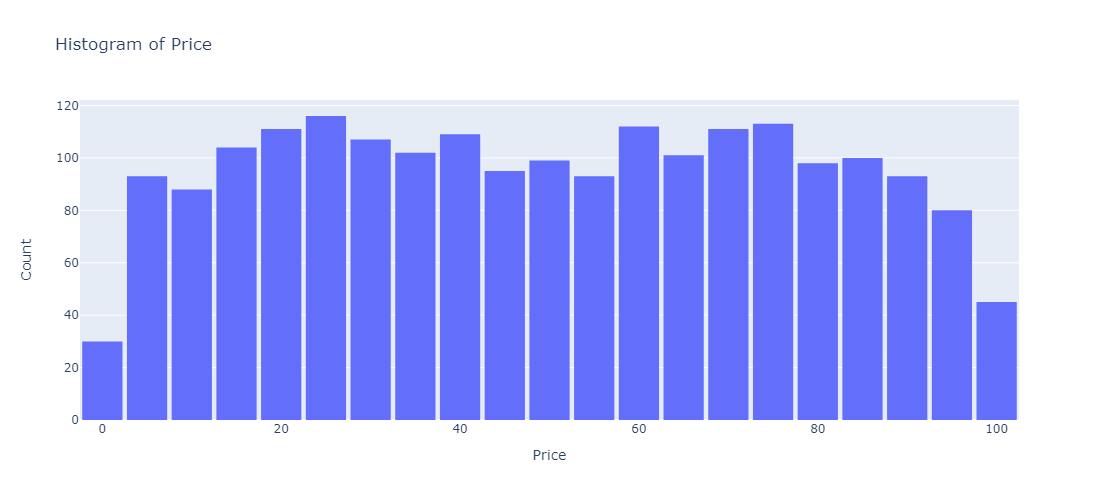

In [188]:
#Distribution of prices within a data set
fig9 = px.histogram(df, x='Price', title='Histogram of Price')

fig9.update_layout(
    xaxis_title='Price',
    yaxis_title='Count',
    width=800,
    height=500,
    bargap=0.1 
)

# Show plot
fig9.show()

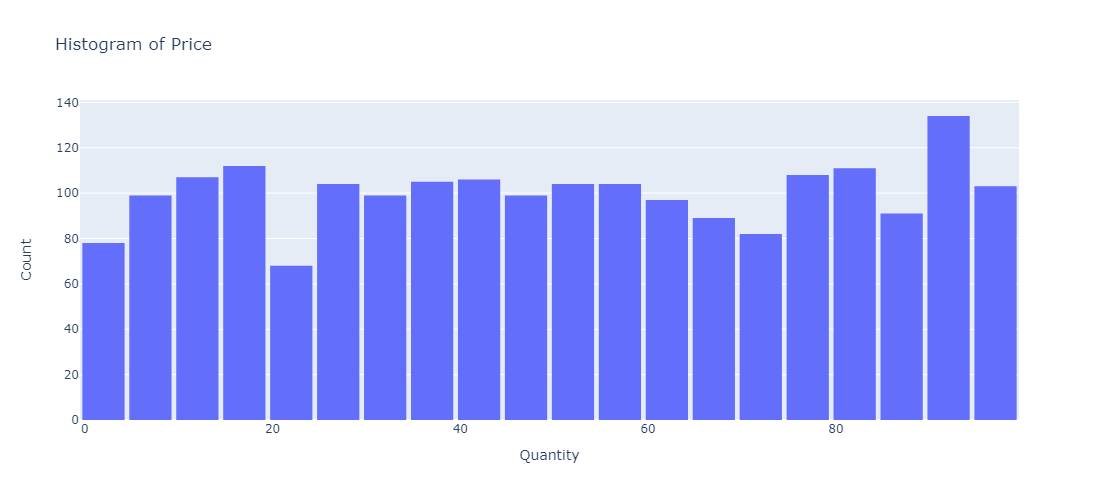

In [190]:
#Distribution of quantity within a data set

fig10 = px.histogram(df, x='Quantity', title='Histogram of Price')

fig10.update_layout(
    xaxis_title='Quantity',
    yaxis_title='Count',
    width=800,
    height=500,
    bargap=0.1 
)

# Show plot
fig10.show()

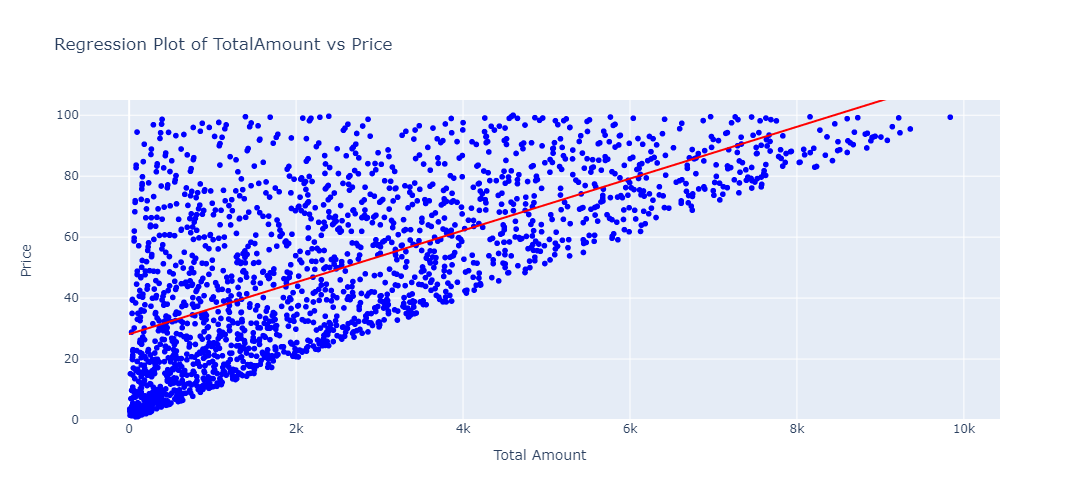

In [192]:
fig11 = px.scatter(df, x='TotalAmount', y='Price', trendline='ols', title='Regression Plot of TotalAmount vs Price')

fig11.update_traces(marker=dict(color='blue'), line=dict(color='red'))
fig11.update_layout(
    yaxis=dict(range=[0, df['Price'].max() + 5]),  # Set y-axis limit to start at 0
    xaxis_title='Total Amount',
    yaxis_title='Price',
    width=800,
    height=500
)

# Show plot
fig11.show()

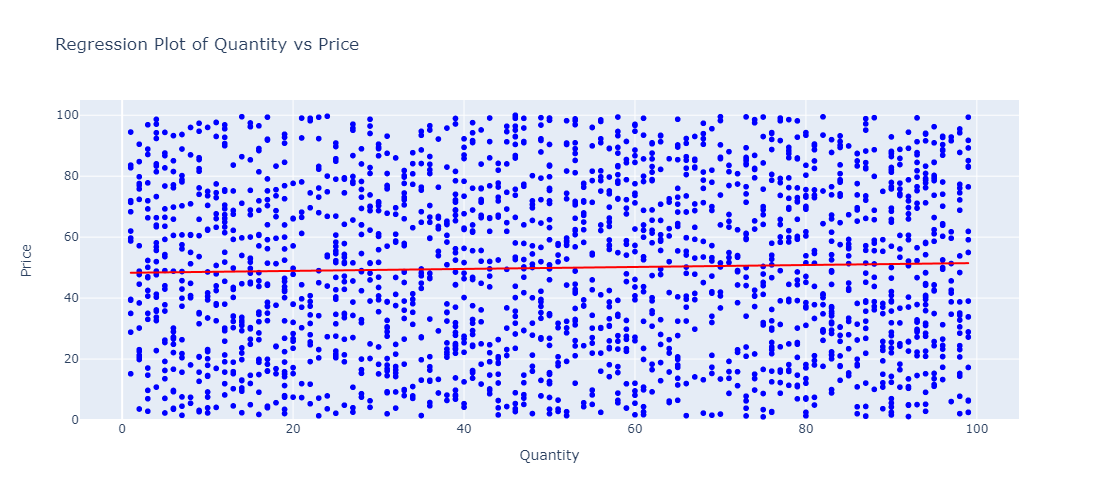

In [193]:
fig12 = px.scatter(df, x='Quantity', y='Price', trendline='ols', title='Regression Plot of Quantity vs Price')

# Set y-axis limits to start at 0
fig12.update_traces(marker=dict(color='blue'), line=dict(color='red'))
fig12.update_layout(
    yaxis=dict(range=[0, df['Price'].max() + 5]),
    xaxis_title='Quantity',
    yaxis_title='Price',
    width=800,
    height=500
)

# Show plot
fig12.show()

In [195]:
#Calculation of corration coefient  for Quantity,	TotalAmount,	Price
df[['Quantity','TotalAmount', 'Price']].corr()

,Quantity,TotalAmount,Price
Quantity,1.000000,0.668633,0.033266
TotalAmount,0.668633,1.000000,0.670401
Price,0.033266,0.670401,1.000000
